In [2]:
import pandas as pd
import numpy as np
import statsmodels.stats.multicomp as multi 
import statsmodels.formula.api as smf


In [3]:
add_health = pd.read_csv("add_health.csv", low_memory=False)
print(add_health.shape)

(6504, 2829)


# Handling variables for check: alcohol consumption and skipped days at school
Bare in mind, that originally it's a string variable, because of "Skip" answer, which is marked as " "

In [4]:
add_health['SCHSKIP'] = pd.to_numeric(add_health['H1ED2'].replace(["996","997", "998", " "], np.NaN))

In [5]:
add_health['ALCTIMESYEAR'] = pd.to_numeric(add_health['H1TO15'].replace([96,97,98], np.NaN))
add_health['H1TO16'] = pd.to_numeric(add_health['H1TO16'].replace([96,97, 98, 99], np.NaN))
add_health.loc[add_health['H1TO15'] == 1, 'ALCTIMESYEAR'] = 365 #every day
add_health.loc[add_health['H1TO15'] == 2, 'ALCTIMESYEAR'] = 4*52 #3-5 times per week
add_health.loc[add_health['H1TO15'] == 3, 'ALCTIMESYEAR'] = 1.5*52 #2-3 times per week
add_health.loc[add_health['H1TO15'] == 4, 'ALCTIMESYEAR'] = 2.5*12 #2-3 times per month
add_health.loc[add_health['H1TO15'] == 5, 'ALCTIMESYEAR'] = 10
add_health.loc[add_health['H1TO15'] == 6, 'ALCTIMESYEAR'] = 1.5
add_health.loc[add_health['H1TO15'] == 7, 'ALCTIMESYEAR'] = 0.1
add_health['ALCCONS'] = add_health['ALCTIMESYEAR']*add_health['H1TO16']

In [6]:
add_health['SIGCTIMESYEAR'] = pd.to_numeric(add_health['H1TO5'].replace([96,97,98], np.NaN))
add_health['H1TO7'] = pd.to_numeric(add_health['H1TO7'].replace([96,97, 98, 99], np.NaN))
add_health = add_health.drop(add_health[add_health['SIGCTIMESYEAR'] == np.NaN].index)
add_health = add_health.drop(add_health[add_health['H1TO7'] == np.NaN].index)

add_health = add_health.drop(add_health[add_health['SIGCTIMESYEAR'] == np.NaN].index)
add_health = add_health.drop(add_health[add_health['H1TO16'] == np.NaN].index)
add_health['SIGCCONS'] = add_health['SIGCTIMESYEAR']*add_health['H1TO7']


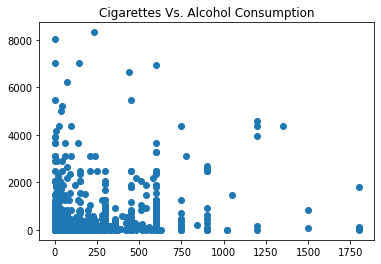

In [7]:
import matplotlib.pyplot as plt

plt.scatter(add_health['SIGCCONS'], add_health['ALCCONS'])
plt.title('Cigarettes Vs. Alcohol Consumption')
plt.show()

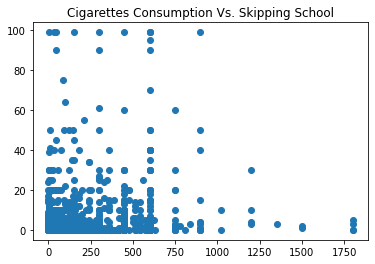

In [8]:
plt.scatter(add_health['SIGCCONS'], add_health['SCHSKIP'])
plt.title('Cigarettes Consumption Vs. Skipping School')
plt.show()

In [9]:
plt.scatter(add_health['ALCCONS'], add_health['FIGHTS'])
plt.title('Alcohol Consumption Vs. Fights amount')
plt.show()

KeyError: 'FIGHTS'

# Statistical check
### Null-hypothesis is: there's no correlation between smoking sigarettes and alcohol consumption among adolescents
Both of the variables are quantitative, so in order to check hypothesis, Pearson correlation coefficient will be used

In [10]:
import scipy
sub = add_health[['ALCCONS', 'SCHSKIP', 'SIGCCONS']].dropna()

print("Correlation between sigarettes consumption and skipping school lessons is:")
print (scipy.stats.pearsonr(sub['SIGCCONS'], sub['SCHSKIP'])[0])
print('p-value is: \n' + str(scipy.stats.pearsonr(sub['SIGCCONS'], sub['SCHSKIP'])[1]))
print()
print("Correlation between sigarettes consumption and alcohol consumption is:")
print (scipy.stats.pearsonr(sub['SIGCCONS'], sub['ALCCONS'])[0])
print('p-value is: \n' + str(scipy.stats.pearsonr(sub['SIGCCONS'], sub['ALCCONS'])[1]))
print()
print('\n*p-value reflects probability of getting this correlation if variables are not correlated')



Correlation between sigarettes consumption and skipping school lessons is:
0.2071100590275429
p-value is: 
1.4093262023968012e-13

Correlation between sigarettes consumption and alcohol consumption is:
0.12699258734793745
p-value is: 
6.680592465100921e-06


*p-value reflects probability of getting this correlation if variables are not correlated


In [11]:
# print (scipy.stats.pearsonr(add_health['MARJUSAGE'], add_health['ALCCONS']))
print (scipy.stats.pearsonr(add_health['ALCCONS'], add_health['SCHSKIP']))

print()

# print (scipy.stats.pearsonr(add_health['ALCCONS'], add_health['FIGHTS']))
# print (scipy.stats.pearsonr(add_health['MARJUSAGE'], add_health['FIGHTS']))
# print (scipy.stats.pearsonr(add_health['SIGCCONS'], add_health['FIGHTS']))
# print (scipy.stats.pearsonr(add_health['WORKH'], add_health['FIGHTS']))
# print (scipy.stats.pearsonr(add_health['COCUSAGE'], add_health['FIGHTS']))
# print (scipy.stats.pearsonr(add_health['COCUSAGE'], add_health['SCHSKIP']))

print()


# print (scipy.stats.pearsonr(add_health['WORKP'], add_health['WORKH']))
# print (scipy.stats.pearsonr(add_health['WORKPS'], add_health['WORKHS']))
# print (scipy.stats.pearsonr(add_health['WORKH'], add_health['WORKHS']))


ValueError: array must not contain infs or NaNs

In [12]:
#how important is religion for you
add_health['H1RE4'] = add_health['H1RE4'].replace(6, np.NaN)
add_health['H1RE4'] = add_health['H1RE4'].replace(8, np.NaN)
#if has no religion replace with the value not important
add_health['H1RE4'] = add_health['H1RE4'].replace(7, 4)
add_health['H1RE4'] = add_health['H1RE4'].astype('category')
sub = add_health[['H1RE4', 'SCHSKIP', 'SIGCCONS']].dropna()
sub['H1RE4'] = sub['H1RE4'].astype('category')

#1 & 2 in the answers means that religion is very or fairly important
sub1 = sub[(sub['H1RE4'] == 1) | (sub['H1RE4'] == 2)]
#3 & 4 in the answers means that religion is fairly or completely not important
sub2 = sub[(sub['H1RE4'] == 3) | (sub['H1RE4'] == 4)]

print("Correlation between sigarettes consumption and skipping school lessons for religious adolescents is:")
print (scipy.stats.pearsonr(sub1['SIGCCONS'], sub1['SCHSKIP'])[0])
print('p-value is: \n' + str(scipy.stats.pearsonr(sub1['SIGCCONS'], sub1['SCHSKIP'])[1]))
print()
print("Correlation between sigarettes consumption and skipping school lessons for non-religious adolescents is:")
print (scipy.stats.pearsonr(sub2['SIGCCONS'], sub2['SCHSKIP'])[0])
print('p-value is: \n' + str(scipy.stats.pearsonr(sub2['SIGCCONS'], sub2['SCHSKIP'])[1]))


Correlation between sigarettes consumption and skipping school lessons for religious adolescents is:
0.196713271793804
p-value is: 
7.726023946362247e-11

Correlation between sigarettes consumption and skipping school lessons for non-religious adolescents is:
0.1812442809784094
p-value is: 
4.115133570469784e-05


In [13]:
#how important is religion for you
add_health['H1RE4'] = add_health['H1RE4'].replace(6, np.NaN)
add_health['H1RE4'] = add_health['H1RE4'].replace(8, np.NaN)
#if has no religion replace with the value not important
add_health['H1RE4'] = add_health['H1RE4'].replace(7, 4)
add_health['H1RE4'] = add_health['H1RE4'].astype('category')
sub = add_health[['H1RE4', 'SCHSKIP', 'ALCCONS']].dropna()
sub['H1RE4'] = sub['H1RE4'].astype('category')

#1 & 2 in the answers means that religion is very or fairly important
sub1 = sub[(sub['H1RE4'] == 1) | (sub['H1RE4'] == 2)]
#3 & 4 in the answers means that religion is fairly or completely not important
sub2 = sub[(sub['H1RE4'] == 3) | (sub['H1RE4'] == 4)]

print("Correlation between sigarettes consumption and skipping school lessons for religious adolescents is:")
print (scipy.stats.pearsonr(sub1['ALCCONS'], sub1['SCHSKIP'])[0])
print('p-value is: \n' + str(scipy.stats.pearsonr(sub1['ALCCONS'], sub1['SCHSKIP'])[1]))
print()
print("Correlation between sigarettes consumption and skipping school lessons for non-religious adolescents is:")
print (scipy.stats.pearsonr(sub2['ALCCONS'], sub2['SCHSKIP'])[0])
print('p-value is: \n' + str(scipy.stats.pearsonr(sub2['ALCCONS'], sub2['SCHSKIP'])[1]))


Correlation between sigarettes consumption and skipping school lessons for religious adolescents is:
0.10846402560015227
p-value is: 
7.512279646736816e-07

Correlation between sigarettes consumption and skipping school lessons for non-religious adolescents is:
0.14212739842405725
p-value is: 
8.165624568275958e-05


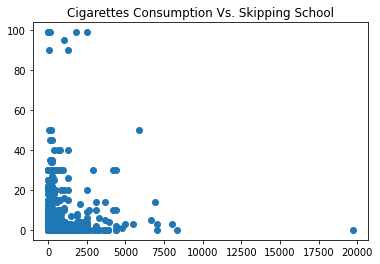

In [15]:
plt.scatter(sub1['ALCCONS'], sub1['SCHSKIP'])
plt.title('Cigarettes Consumption Vs. Skipping School')
plt.show()

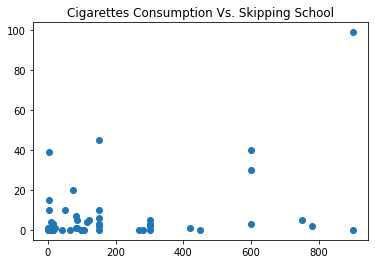

In [62]:
plt.scatter(sub2['SIGCCONS'], sub2['SCHSKIP'])
plt.title('Cigarettes Consumption Vs. Skipping School')
plt.show()

In [31]:
field = 'SCHSKIP'

In [33]:
field = 'SCHSKIP'
sub_main = add_health[[field, 'ALCCONS']].dropna()

sub = add_health[['H1GI6D', field, 'ALCCONS']].dropna()
sub_b = add_health[['H1GI6B', field, 'ALCCONS']].dropna()
sub_w = add_health[['H1GI6A', field, 'ALCCONS']].dropna()
sub_c = add_health[['H1GI6C', field, 'ALCCONS']].dropna()

#1 are those who marked their race as asian
sub1 = sub[sub['H1GI6D'] == 1]
#1 are those who marked their race as Black or African American
sub2 = sub_b[sub_b['H1GI6B'] == 1]
#1 are those who marked their race as white
sub3 = sub_w[sub_w['H1GI6A'] == 1]
#1 are those who marked their race as Native American
sub4 = sub_c[sub_c['H1GI6C'] == 1]
main_stat = scipy.stats.pearsonr(sub_main['ALCCONS'], sub_main[field])
asian_stat = scipy.stats.pearsonr(sub1['ALCCONS'], sub1[field])
black_stat = scipy.stats.pearsonr(sub2['ALCCONS'], sub2[field])
white_stat = scipy.stats.pearsonr(sub3['ALCCONS'], sub3[field])
native_stat = scipy.stats.pearsonr(sub4['ALCCONS'], sub4[field])

print("Correlation between alcohol consumption and skipping school lessons for general population of adolescents is:")
print (main_stat[0])
print('p-value is: \n' + str(main_stat[1]))
print()
print("Correlation between alcohol consumption and skipping school lessons for asian adolescents is:")
print (asian_stat[0])
print('p-value is: \n' + str(asian_stat[1]))
print()
print("Correlation between alcohol consumption and skipping school lessons for white adolescents is:")
print (white_stat[0])
print('p-value is: \n' + str(white_stat[1]))
print()
print("Correlation between alcohol consumption and skipping school lessons for Black or African American adolescents is:")
print (black_stat[0])
print('p-value is: \n' + str(black_stat[1]))
print()
print("Correlation between alcohol consumption and skipping school lessons for Native American adolescents is:")
print (native_stat[0])
print('p-value is: \n' + str(native_stat[1]))


Correlation between alcohol consumption and skipping school lessons for general population of adolescents is:
0.12369144327219336
p-value is: 
3.854407304935836e-11

Correlation between alcohol consumption and skipping school lessons for asian adolescents is:
0.6434688208726075
p-value is: 
1.7274086846520035e-15

Correlation between alcohol consumption and skipping school lessons for white adolescents is:
0.125941834125765
p-value is: 
8.879985646052405e-09

Correlation between alcohol consumption and skipping school lessons for Black or African American adolescents is:
0.04134300153307485
p-value is: 
0.3538421385951609

Correlation between alcohol consumption and skipping school lessons for Native American adolescents is:
0.22748217709978147
p-value is: 
0.021483590117593543


In [22]:
sub = add_health[['H1GI6D', 'SIGCCONS', 'ALCCONS']].dropna()
sub_b = add_health[['H1GI6B', 'SIGCCONS', 'ALCCONS']].dropna()
sub_w = add_health[['H1GI6A', 'SIGCCONS', 'ALCCONS']].dropna()
sub_c = add_health[['H1GI6C', 'SIGCCONS', 'ALCCONS']].dropna()

#1 are those who marked their race as asian
sub1 = sub[sub['H1GI6D'] == 1]
#1 are those who marked their race as Black or African American
sub2 = sub_b[sub_b['H1GI6B'] == 1]
#1 are those who marked their race as white
sub3 = sub_w[sub_w['H1GI6A'] == 1]
#1 are those who marked their race as Native American
sub4 = sub_c[sub_c['H1GI6C'] == 1]


print("Correlation between sigarettes consumption and skipping school lessons for asian adolescents is:")
print (scipy.stats.pearsonr(sub1['SIGCCONS'], sub1['SCHSKIP'])[0])
print('p-value is: \n' + str(scipy.stats.pearsonr(sub1['ALCCONS'], sub1['SCHSKIP'])[1]))
print()
print("Correlation between sigarettes consumption and skipping school lessons for white adolescents is:")
print (scipy.stats.pearsonr(sub2['SIGCCONS'], sub2['SCHSKIP'])[0])
print('p-value is: \n' + str(scipy.stats.pearsonr(sub2['ALCCONS'], sub2['SCHSKIP'])[1]))
print()
print("Correlation between sigarettes consumption and skipping school lessons for Black or African American adolescents is:")
print (scipy.stats.pearsonr(sub3['ALCCONS'], sub3['SCHSKIP'])[0])
print('p-value is: \n' + str(scipy.stats.pearsonr(sub3['ALCCONS'], sub3['SCHSKIP'])[1]))
print()
print("Correlation between sigarettes consumption and skipping school lessons for Native American adolescents is:")
print (scipy.stats.pearsonr(sub4['ALCCONS'], sub4['SCHSKIP'])[0])
print('p-value is: \n' + str(scipy.stats.pearsonr(sub4['ALCCONS'], sub4['SCHSKIP'])[1]))


Correlation between sigarettes consumption and skipping school lessons for asian adolescents is:
0.6434688208726075
p-value is: 
1.7274086846520035e-15

Correlation between sigarettes consumption and skipping school lessons for white adolescents is:
0.04134300153307485
p-value is: 
0.3538421385951609

Correlation between sigarettes consumption and skipping school lessons for Black or African American adolescents is:
0.125941834125765
p-value is: 
8.879985646052405e-09

Correlation between sigarettes consumption and skipping school lessons for Native American adolescents is:
0.22748217709978147
p-value is: 
0.021483590117593543


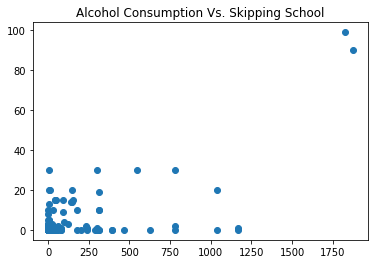

In [35]:
plt.scatter(sub1['ALCCONS'], sub1['SCHSKIP'])
plt.title('Alcohol Consumption Vs. Skipping School')
plt.show()

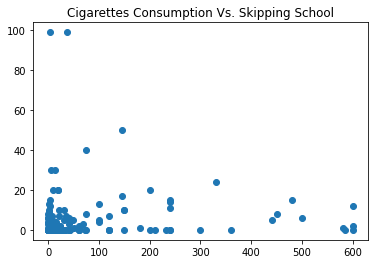

In [19]:
plt.scatter(sub2['SIGCCONS'], sub2['SCHSKIP'])
plt.title('Cigarettes Consumption Vs. Skipping School')
plt.show()

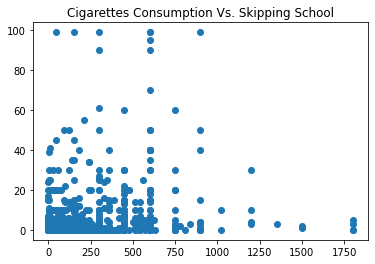

In [20]:
plt.scatter(sub3['SIGCCONS'], sub3['SCHSKIP'])
plt.title('Cigarettes Consumption Vs. Skipping School')
plt.show()

In [64]:
#Parents give you right to decide different aspects of your life: H1WP1 -> H1WP7
#I will combine these columns 5 and more Yes -> encourage independance, otherwise No
add_health[add_health.filter(regex=('H1WP[1-7]{1}$')).columns] = add_health.filter(regex=('H1WP[1-7]{1}$')).replace([6,7, 8, 9], np.NaN)

add_health['H1INDCOM'] = np.where(add_health.filter(regex=('H1WP[1-7]{1}$')).sum(axis=1) > 4, 1, 0)

#1 & 2 in the answers means that religion is very or fairly important
sub1 = add_health[add_health['H1GI6D'] == 1]
#3 & 4 in the answers means that religion is fairly or completely not important
sub2 = add_health[add_health['H1GI6D'] != 1]


print("Correlation between sigarettes consumption and skipping school lessons for indep adolescents is:")
print (scipy.stats.pearsonr(sub1['SIGCCONS'], sub1['SCHSKIP'])[0])
print('p-value is: \n' + str(scipy.stats.pearsonr(sub1['SIGCCONS'], sub1['SCHSKIP'])[1]))
print()
print("Correlation between sigarettes consumption and skipping school lessons for non-indep adolescents is:")
print (scipy.stats.pearsonr(sub2['SIGCCONS'], sub2['FIGHTS'])[0])
print('p-value is: \n' + str(scipy.stats.pearsonr(sub2['SIGCCONS'], sub2['SCHSKIP'])[1]))


Correlation between sigarettes consumption and skipping school lessons for indep adolescents is:
0.7380257603682937
p-value is: 
0.036579761977986944

Correlation between sigarettes consumption and skipping school lessons for non-indep adolescents is:
-0.056292235441783134
p-value is: 
4.546003680150449e-07


In [94]:
sub1 = add_health[add_health['H1INDCOM'] == 1]
#3 & 4 in the answers means that religion is fairly or completely not important
sub2 = add_health[add_health['H1INDCOM'] != 1]

sub = sub1[['H1RE4', 'SCHSKIP']].dropna()
sub['H1RE4'] = sub['H1RE4'].astype('category')
model1 = smf.ols(formula='SCHSKIP ~ C(H1RE4)', data=sub)
results1 = model1.fit()
print (results1.summary())

sub = sub2[['H1RE4', 'SCHSKIP']].dropna()
sub['H1RE4'] = sub['H1RE4'].astype('category')
model1 = smf.ols(formula='SCHSKIP ~ C(H1RE4)', data=sub)
results1 = model1.fit()
print (results1.summary())


                            OLS Regression Results                            
Dep. Variable:                SCHSKIP   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     7.435
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           6.14e-08
Time:                        17:17:55   Log-Likelihood:                -15565.
No. Observations:                4398   AIC:                         3.114e+04
Df Residuals:                    4391   BIC:                         3.119e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4465      0.198      7.310

In [37]:
# H1GI7
sub1 = add_health[add_health['H1GI6D'] == 1]
#3 & 4 in the answers means that religion is fairly or completely not important
sub2 = add_health[add_health['H1GI6D'] != 1]

# H1GI6D
print(sub1)
# ct1=pd.crosstab(sub1['H1INDCOM'], sub1['H1RE4'])
# print (ct1)

# # column percentages
# colsum=ct1.sum(axis=0)
# colpct=ct1/colsum
# print(colpct)

# # chi-square
# print ('chi-square value, p value, expected counts')
# cs1= scipy.stats.chi2_contingency(ct1)
# print (cs1)

# print()

# ct1=pd.crosstab(sub2['H1INDCOM'], sub2['H1RE4'])
# print (ct1)

# # column percentages
# colsum=ct1.sum(axis=0)
# colpct=ct1/colsum
# print(colpct)

# # chi-square
# print ('chi-square value, p value, expected counts')
# cs1= scipy.stats.chi2_contingency(ct1)
# print (cs1)

           AID  IMONTH  IDAY  IYEAR  SCID  SSCID  COMMID   MACNO   INTID  \
23    57127241       8    15     95    78     78     478  100151  927151   
34    57136630       5    16     95    78     78     478  100153  927153   
41    57145151       6    17     95    28     28     428  100163  928163   
51    57159779       8    14     95   177     77     477  100440  902440   
56    57164981       5    11     95    78     78     478  100154  927154   
...        ...     ...   ...    ...   ...    ...     ...     ...     ...   
6188  99576944       6     7     95    78     78     478  100151  927151   
6189  99576947       6    30     95    78     78     478  100155  927155   
6411  99715095       7    29     95   127     27     427  100363  930363   
6440  99716235       6    16     95   176     76     476  100375  930375   
6453  99716929       6    29     95   170     70     470  100389  931389   

      SCH_YR  ...  SMP08 CLUSTER1 CLUSTER2 IMONTH2 IYEAR2 H2GI1M H2GI1Y  \
23         0